In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the Data
data = pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\16. Neural Networks\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
# Check Null Value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
# Check Duplicate Value
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


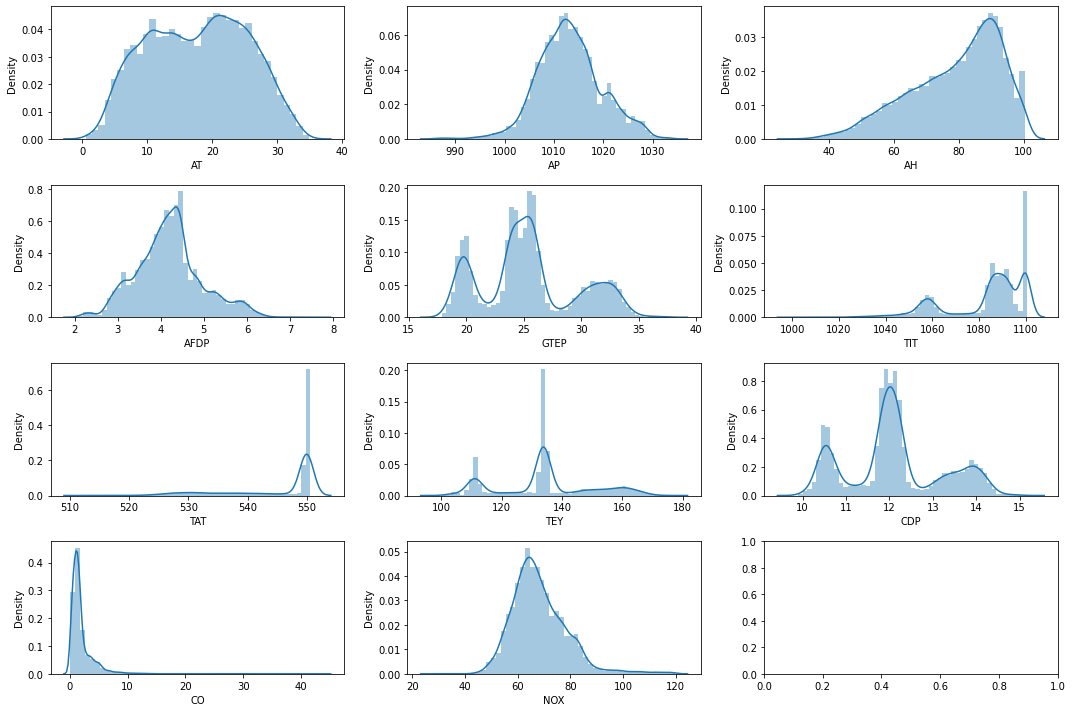

In [6]:
# Cheking of distribution of data using distplot
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2])
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1])
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0])
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2])
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

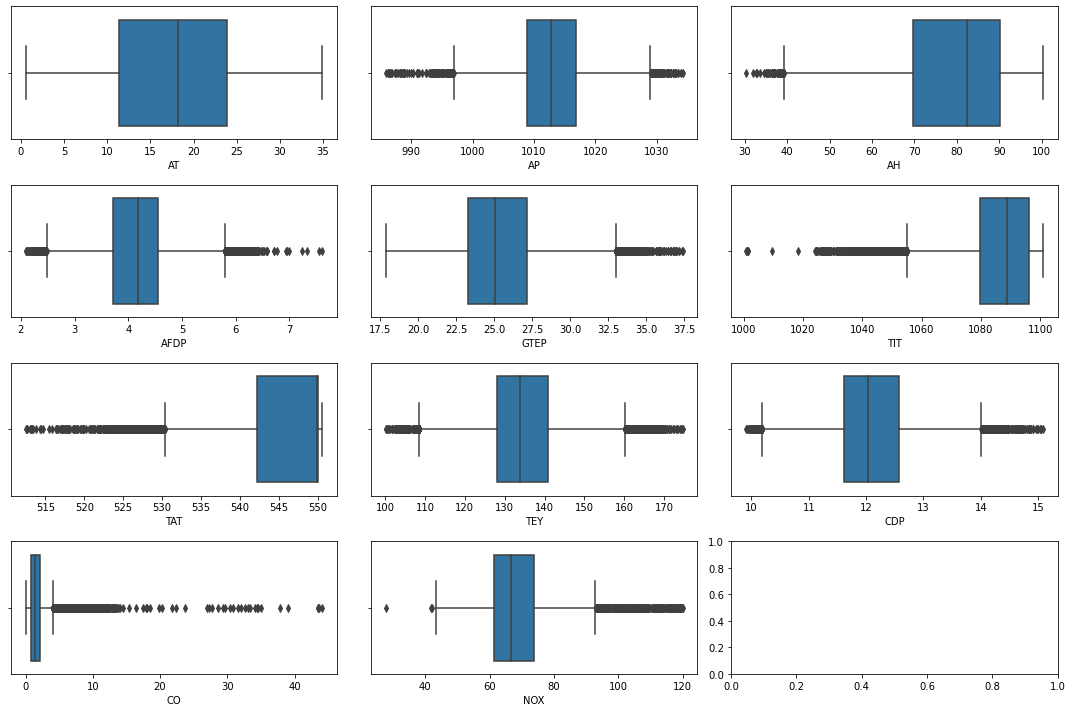

In [7]:
#Check whether outliers are present inside the data 
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0])
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0])
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2])
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [9]:
#Normalising the data using a mixmax scaler library
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [10]:
#Extracting the independent and dependent variables
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [11]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [12]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [13]:
#Fixing a random seed for ensuring that the algorithm produces the same accuracy by selecting a similar sample, everytime, it runs the code
seed = 7
np.random.seed(seed)

In [14]:
# Build a Sequential neural network with 12 neurons in the first input layer, 8 neurons in the hidden layer and 1 neuron in the output layer
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [15]:
#Compiling the model and using Mean squared error as the loss function and adam as the weight optimizer
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [16]:
#Fit the model
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 6s 4ms/step - loss: 0.0105 - accuracy: 9.9246e-05 - val_loss: 0.0011 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 4s 4ms/step - loss: 6.4469e-04 - accuracy: 9.9246e-05 - val_loss: 7.7859e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 5s 5ms/step - loss: 4.9184e-04 - accuracy: 9.9246e-05 - val_loss: 5.0809e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 5s 5ms/step - loss: 3.9608e-04 - accuracy: 9.9246e-05 - val_loss: 3.7991e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 6s 6ms/step - loss: 3.4856e-04 - accuracy: 9.9246e-05 - val_loss: 3.2983e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 6s 6ms/step - loss: 3.0640e-04 - accuracy: 9.9246e-05 - val_loss: 4.1328e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===================

Epoch 52/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6528e-04 - accuracy: 9.9246e-05 - val_loss: 3.3062e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6644e-04 - accuracy: 9.9246e-05 - val_loss: 2.5907e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 5s 4ms/step - loss: 2.6586e-04 - accuracy: 9.9246e-05 - val_loss: 2.7438e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6438e-04 - accuracy: 9.9246e-05 - val_loss: 2.4734e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6370e-04 - accuracy: 9.9246e-05 - val_loss: 2.3577e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6809e-04 - accuracy: 9.9246e-05 - val_loss: 2.4749e-04 - val_accuracy: 2.0149e-04
Epoch 58/100
1008/1008 [====

In [17]:
#Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 3ms/step - loss: 2.7674e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [18]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6625e-04 - accuracy: 9.9246e-05 - val_loss: 2.3670e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6373e-04 - accuracy: 9.9246e-05 - val_loss: 2.5453e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6624e-04 - accuracy: 9.9246e-05 - val_loss: 3.0388e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.6144e-04 - accuracy: 9.9246e-05 - val_loss: 2.4360e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6331e-04 - accuracy: 9.9246e-05 - val_loss: 2.5051e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.6306e-04 - accuracy: 9.9246e-05 - val_loss: 2.5626e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 5s 5ms/step - loss: 2.6259e-04 - accuracy: 9.9246e-05 - val_loss: 2.2386e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.5863e-04 - accuracy: 9.9246e-05 - val_loss: 2.3594e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.6094e-04 - accuracy: 9.9246e-05 - val_loss: 2.4705e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.6050e-04 - accuracy: 9.9246e-05 - val_loss: 2.2572e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.5791e-04 - accuracy: 9.9246e-05 - val_loss: 2.2491e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 5s 5ms/step - loss: 2.5643e-04 - accuracy: 9.9246e-05 - val_loss: 2.7429e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [19]:
#List all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

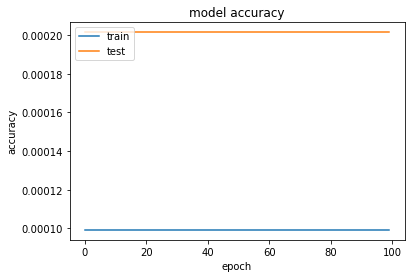

In [20]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

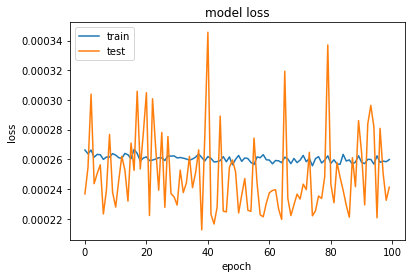

In [21]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Tuning of Hyperparameters :- Batch Size and Epochs

In [22]:
#Creating a user defined function, that has the neural network model and compiles the model with the loss function and weight optimizers
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [23]:
#Using Gridsearch CV, to find the best parameters, that contributes to higher accuracy of Regression, by passing in the user defined model function
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  30.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  34.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  30.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  31.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  29.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,